# <span style="color:blue">Programming for Data Science - DS-GA 1007</span>
## <span style="color:blue">Assignment 7: Numpy - Part II and Matplotlib 
### <em> Due Sunday November 10 by 11:59PM</em> 
</span>
---

Please import the following package

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from countwords import load_word_counts, plot_ascii_bars

### Question 1: (2.0 points) 

1. (0.5 point) Create a two-dimensional numpy array called <font color='blue'>A</font> with six rows and three columns by broadcasting the array `A1` = [1 2 3 4 5 6] with another array `A2`. (Think about what shape `A2` should be. `A2` can be all ones or all zeros, for example.)

In [2]:
A1 = np.array([1, 2, 3, 4, 5, 6])

In [3]:
# YOUR CODE OR RESPONSE HERE
A2 = np.ones((1,3))
A = A1.reshape(6,1)*A2

print(A)
A.shape

# matrix multiplication: (m x n) x (n x k) = (m x k)

[[1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]
 [4. 4. 4.]
 [5. 5. 5.]
 [6. 6. 6.]]


(6, 3)

2. (0.5 point) Create arrays <font color='blue'>B</font> and <font color='blue'>C</font> where <font color='blue'>B</font> is a copy and <font color='blue'>C</font> is a view of <font color='blue'>A</font>, respectively. Use the methods `copy()` and `view()` from numpy and the command `id()` to make sure <font color='blue'>B</font> and <font color='blue'>C</font> do not reference to the same location as <font color='blue'>A</font>. 

In [4]:
# YOUR CODE OR RESPONSE HERE
B = np.copy(A)
C = A.view()

print('The reference of A is: %i'% id(A))
print('The reference of B is: %i'% id(B))
print('The reference of C is: %i'% id(C))

# Note: the references are not the same for A, B, or C.

The reference of A is: 47641313411920
The reference of B is: 47641313413600
The reference of C is: 47641313413680


3. Set the top-left most element of <font color='blue'>A</font> to 0. Check whether B and/or C change as well.

In [5]:
# YOUR CODE OR RESPONSE HERE
A[0,0] = 0

print('A looks like:')
print(A)
print('-------------------------')
print('B looks like:')
print(B)
print('-------------------------')
print('C looks like:')
print(C)

#Note: The first element [0,0] in both A and C changed, but the first element of B did not change.

A looks like:
[[0. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]
 [4. 4. 4.]
 [5. 5. 5.]
 [6. 6. 6.]]
-------------------------
B looks like:
[[1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]
 [4. 4. 4.]
 [5. 5. 5.]
 [6. 6. 6.]]
-------------------------
C looks like:
[[0. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]
 [4. 4. 4.]
 [5. 5. 5.]
 [6. 6. 6.]]


4. (1.0 point) Reshape <font color='blue'>C</font> to nine rows and two columns and create a new variable <font color='blue'>D</font> by copying the rows 3,6, and 8 from <font color='blue'>C</font> (zero-indexed). 

In [6]:
# YOUR CODE OR RESPONSE HERE
C = np.reshape(C, (9,2))
D = np.array([np.copy(C[2]),np.copy(C[5]), np.copy(C[7]) ])


print('Reshaped C looks like:')
print(C)
print('-------------------------')
print('D looks like:')
print(D)

Reshaped C looks like:
[[0. 1.]
 [1. 2.]
 [2. 2.]
 [3. 3.]
 [3. 4.]
 [4. 4.]
 [5. 5.]
 [5. 6.]
 [6. 6.]]
-------------------------
D looks like:
[[2. 2.]
 [4. 4.]
 [5. 6.]]


### Question 2: (2.0 points) 
Consider an $n\times n,\, n\geq 2$ array <font color='blue'>A</font>. For instance, with $n=4$:
$$
A=\left(\begin{array}[cccc]\\
1 & 3 & 2 & 6 \\
3 & 5 & 1 & {7} \\
{0} & 4 & {2} & {6} \\
6 & 1 & 3 & {1} 
\end{array}\right)
$$
Create a 2$\times$2 array <font color='blue'>B</font> where the first row corresponds to the minimal and maximal elements in the upper triangluar part of <font color='blue'>A</font> and the second row corresponds to the minimal and maximal elements in the lower triangluar part of <font color='blue'>A</font>. The main diagonal should be considered as belonging to both the upper and lower triangular part of <font color='blue'>A</font>. In the above example the solution would be 
$$
B=\left(\begin{array}[cc]\\
1 & 7  \\
0 & 6  
\end{array}\right)
$$
Your solution (the python code) should work for any $n\times n,\, n\geq 2$ array.<br>

__Hint__: Use the numpy methods "triu_indices" and "tril_indices" combined with "max" and "min".

In [7]:
### TEST
n = 5
A = np.random.randint(low=0,high=30,size=(n,n))
print("Matrix A:")
print(A)

upper = np.triu_indices(n) # Return the indices for the upper-triangle of an (n, m) array.
lower = np.tril_indices(n) 
B = np.array([np.min(A[upper]), np.max(A[upper]), np.min(A[lower]), np.max(A[lower])]).reshape(2,2)

print('-------------------------')
print("Matrix B: max, min, triu, tril")
print(B)

Matrix A:
[[29 17 23 19 13]
 [28 24 13 29 19]
 [ 8 23 21 23 29]
 [27 16  4  9 10]
 [ 7 21  8  5 24]]
-------------------------
Matrix B: max, min, triu, tril
[[ 9 29]
 [ 4 29]]


### Question 3:  (3.0 points) Linear Regression
Given a set of points $(x_0,y_0),(x_1,y_1),\ldots,(x_n,y_n)$, we can fit a line $y=\alpha_0+\alpha_1 x$ to the points by solving a linear system of the form:

$$
\mathbf{X}^\top \mathbf{X}\alpha = \mathbf{X}^\top \mathbf{y}
$$

where $\mathbf{X}^\top$ is the transpose of $\mathbf{X}$ and 

$$
\mathbf{X}=\left(\begin{array}{cc}
1 & x_0 \\
1 & x_1 \\
\vdots & \vdots \\
1 & x_n 
\end{array}\right),
\qquad
\alpha = \left(\begin{array}{c}
\alpha_0 \\
\alpha_1 
\end{array}\right),
\qquad
\mathbf{y} = \left(\begin{array}{c}
y_0 \\
y_1 \\
\vdots \\
y_n
\end{array}\right)
$$

Supposing the points $(x_i,y_i)$ are generated by the code:

```python
x_data = np.random.uniform(0,1,100)
y_data = 1.0-x+np.random.uniform(-0.3,0.3,100)
```

1. (1.5 points) Build the matrix (array) $\mathbf{X}$ and vector $\mathbf{y}$
2. (1.5 points) Solve the linear system $\mathbf{X}^\top \mathbf{X}\alpha = \mathbf{X}^\top \mathbf{y}$ using "numpy.linalg.solve" and print the value of $\alpha_0$ and $\alpha_1$.


In [8]:
np.random.seed(1234)
x_data = np.random.uniform(0,1,100)
y_data = 1.0-x_data+np.random.uniform(-0.3,0.3,100)

In [9]:
# YOUR CODE OR RESPONSE HERE
from numpy.linalg import solve

x_ones = np.ones((100,1))
X = np.column_stack([x_ones, x_data])
Y=np.array(y_data).reshape(100,1)
solved = solve(np.dot(X.T, X), np.dot(X.T, Y))
solved

array([[ 1.02545842],
       [-1.0066075 ]])

### Question 4: (1.5 points) 
Using the result from question 3, plot the points $(x_i,y_i)$ and the fitted line. Your code should produce a figure like this (the exact data points may differ):

![title](linefit.png)

__PS.__ The figure _linefit.png_ is in the same _zip_ file as this notebook.

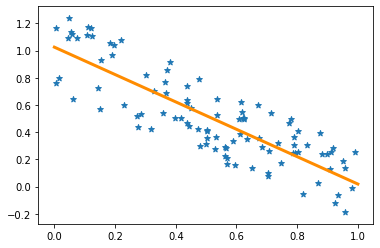

In [10]:
# YOUR CODE OR RESPONSE HERE
x = np.linspace(0,1,100)
m = solved[1]
b = solved[0]
y = m*x+b

plt.scatter(x_data, y_data, marker="*")
plt.plot(x, y, color = 'darkorange', linestyle='-', linewidth=3)

### Question 5: (1.5 points) 
Enrich the plot genereted in question 4 by incorporating a legend and an annotation indicating the fitted line, similar to the figure below:

![title](annotation.png)


__PS.__ The figure _annotation.png_ is in the same _zip_ file as this notebook.

Text(0.22, 0.1, 'fitted line')

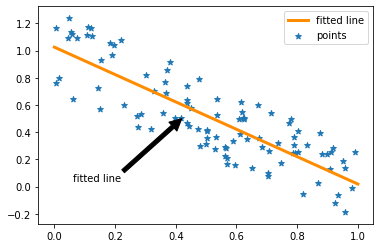

In [11]:
# YOUR CODE OR RESPONSE HERE
plt.scatter(x_data, y_data, marker="*", label='points')
plt.plot(x, y, color = 'darkorange', linestyle='-', linewidth=3, label = 'fitted line')
plt.legend()

# plt.annotate('fitted line', xy=(0.4, 0.5),  xycoords='data',
#             xytext=(0.22, 0.22), textcoords='axes fraction',
#             arrowprops=dict(facecolor='black', shrink=1),
#             horizontalalignment='right', verticalalignment='top')

plt.annotate('fitted line', 
             xy=(0.42, 0.5), 
             xytext=(0.22, 0.1), 
             arrowprops=dict(facecolor='black'),
             horizontalalignment='right', verticalalignment='top')

### Question 6: (1.5 points) 


Execute the following cell to load a file containing three columns of data

In [12]:
file_name = 'isles.dat'
limit = 10
counts = load_word_counts(file_name)

counts[:10]

[('the', 3822, 6.737176097303014),
 ('of', 2460, 4.336329984135378),
 ('and', 1723, 3.0371937246606735),
 ('to', 1479, 2.607086197778953),
 ('a', 1308, 2.305658381808567),
 ('in', 997, 1.7574475586109644),
 ('is', 894, 1.5758857747223691),
 ('that', 652, 1.149303719372466),
 ('by', 607, 1.069980609906575),
 ('it', 573, 1.0100475938656797)]

$1$. Create a list called `words` containing all the entries in the first column, that is, the zeroeth entry of each tuple in `counts`

In [13]:
# YOUR CODE OR RESPONSE HERE
words=[]
for i, j, k in counts: 
    words.append(i)

words[0:10]

['the', 'of', 'and', 'to', 'a', 'in', 'is', 'that', 'by', 'it']

$2$. Create a list called `counts` containing all the entries in the second column, that is, the first entry of each tuple in `counts`

In [14]:
# YOUR CODE OR RESPONSE HERE
counts2=[]
for tup in counts:
        counts2.append(tup[1])

counts = counts2
counts[0:10]

[3822, 2460, 1723, 1479, 1308, 997, 894, 652, 607, 573]

$3$. Look at the code for the function `plot_ascii_bars` in `countwords.py`. 

Use the function to generate a figure with the relative count of the first 10 entries of `counts`. 

Here use `counts[:limit]` and `words[:limit]` as arguments in `plot_ascii_bars` to obtain something like... 

In [15]:
# YOUR CODE OR RESPONSE HERE
import countwords

plot_ascii_bars(values = counts[:limit], labels = words[:limit])

['the   ########################################################################',
 'of    ##########################################',
 'and   #########################',
 'to    ####################',
 'a     ################',
 'in    #########',
 'is    #######',
 'that  ##',
 'by    #',
 'it    ']

![title](ascii.PNG)

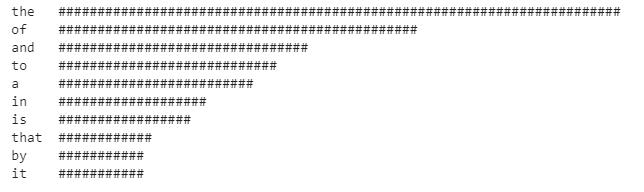

In [16]:
from IPython.display import Image
Image(filename='ascii.PNG')